In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CSV data
data = pd.read_csv("cumin_data.csv")

# Remove rows with zero values in 'area' or 'yield'
data = data.loc[(data['Area'] != 0) & (data['Production'] != 0)]

# Define features (X) and target variable (y)
X = data.drop(['Year', 'District', 'Production'], axis=1)
y = data['Production']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [3]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of principal components to keep
n_components = 8

# Apply PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [4]:
# Linear Regression
def linear_regression():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [5]:
# Polynomial Regression
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    # Apply the same polynomial features transformation to X_test
    X_test_poly = poly.transform(X_test)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(X_train_poly.shape[1], activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train_poly, y_train, epochs=100)
    return model, X_test_poly

In [6]:
# Deep Neural Network
def dnn_regression():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(X_train.shape[1] + 1, activation='relu'),  # Add 1 for bias term
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
for model_func in [linear_regression, polynomial_regression, dnn_regression]:
    # For polynomial regression, pass the degree within the loop
    if model_func == polynomial_regression:
        model, X_test_poly = model_func(2)  # Unpack the model and X_test_poly
        y_pred = model.predict(X_test_poly)  # Use the transformed X_test_poly
    else:
        model = model_func()
        model.fit(X_train_pca, y_train, epochs=100)
        
        # Use the original X_test without transformation
        y_pred_pca = model.predict(X_test_pca)

    mse = mean_squared_error(y_test, y_pred_pca)
    mae = mean_absolute_error(y_test, y_pred_pca)
    r2 = r2_score(y_test, y_pred_pca)

    print("Model:", model_func.__name__)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print("-------------------")

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 54675.8477
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47729.2461  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51397.0000 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53799.4727 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60104.0859 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64541.6758 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49045.2812 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54183.1211  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52243.5352 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56552.1602 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58544.4766 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65050.9922 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56950.1875 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50592.1367 
Epoch 15/100
5/5 ━━━━━━━━━━━

In [8]:
# Elastic Net Regression
def elastic_net_regression(alpha, l1_ratio):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_ratio, l2=alpha))
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [9]:
# Random Forest Regression
def random_forest_regression():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    return model

In [10]:
# Ridge Regression
def ridge_regression(alpha):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(alpha))
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [11]:
# Lasso Regression
def lasso_regression(alpha):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(alpha))
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [12]:
for model_func in [elastic_net_regression, random_forest_regression, ridge_regression, lasso_regression]:
    if model_func == elastic_net_regression:
        model = model_func(alpha=0.1, l1_ratio=0.5)
    elif model_func == ridge_regression:
        model = model_func(alpha=0.1)
    elif model_func == lasso_regression:
        model = model_func(alpha=0.1)
    else:
        model = model_func()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Use the original X_test without transformation
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Model:", model_func.__name__)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print("-------------------")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11269.6934
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model: elastic_net_regression
MSE: 10272.381402612515
MAE: 97.06584952142504
R2: 0.5915145558781778
-------------------
Model: random_forest_regression
MSE: 1665.349799687222
MAE: 18.079916666666662
R2: 0.9337766846964606
-------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 151325.2188  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model: ridge_regression
MSE: 132431.36138093314
MAE: 358.7542751794391
R2: -4.2661872013036835
-------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7746.2495  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model: lasso_regression
MSE: 5244.216284209793
MAE: 57.988582996792246
R2: 0.791461596491976
-------------------


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


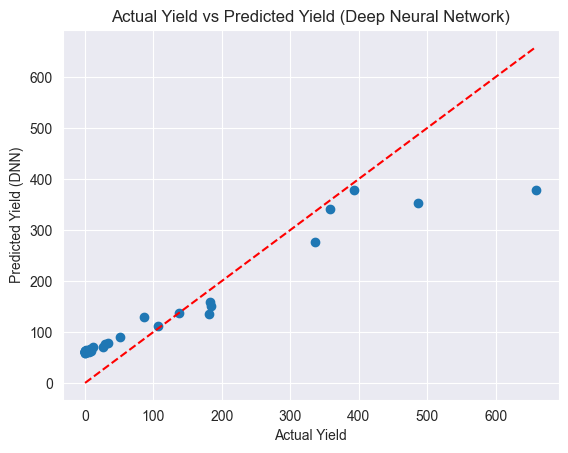

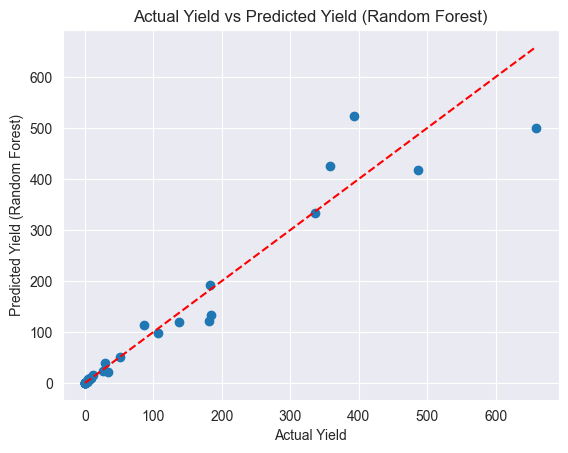

In [13]:
# Visualize Deep Neural Network results
y_pred_dnn = model.predict(X_test)
plt.scatter(y_test, y_pred_dnn)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield (DNN)')
plt.title('Actual Yield vs Predicted Yield (Deep Neural Network)')
plt.plot(np.unique(y_test), np.unique(y_test), 'r--')
plt.show()

# Choose the best model based on evaluation metrics
best_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Use the original X_test without transformation
y_pred_rf = best_model.predict(X_test)

# Visualize Random Forest results
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield (Random Forest)')
plt.title('Actual Yield vs Predicted Yield (Random Forest)')
plt.plot(np.unique(y_test), np.unique(y_test), 'r--')
plt.show()

Model: Random Forest
MSE: 1665.349799687222
MAE: 18.079916666666662
R2: 0.9337766846964606
-------------------


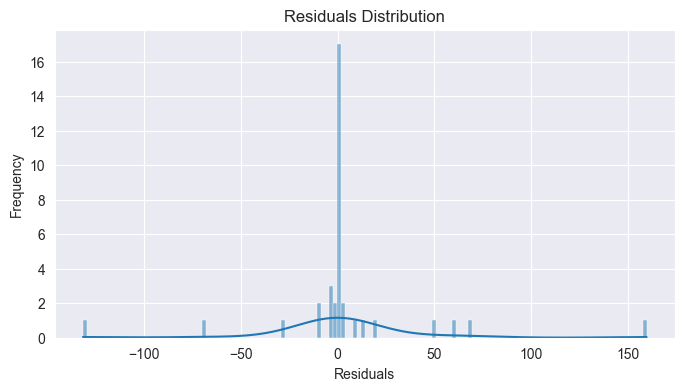

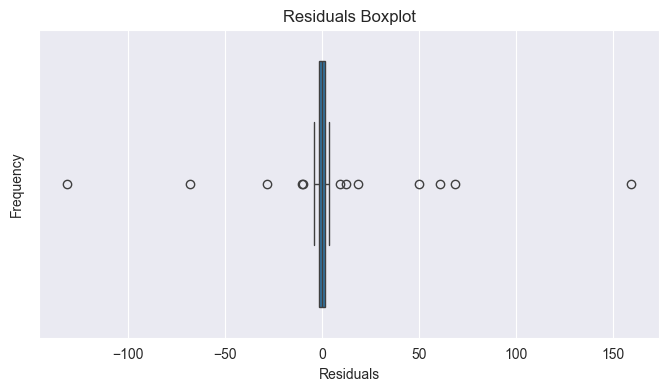

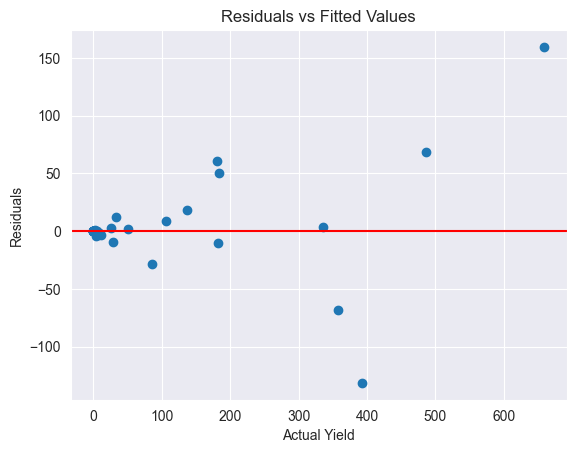

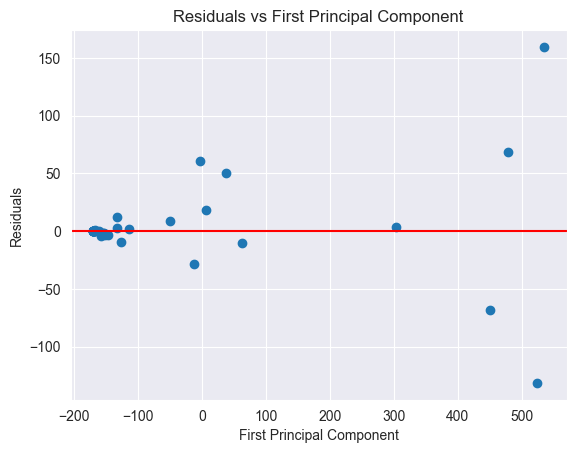

In [14]:
# Model evaluation with the best model (Random Forest)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Model: Random Forest")
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)
print("-------------------")

# Calculate residuals
residuals = y_test - y_pred_rf

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Boxplot of residuals
plt.figure(figsize=(8, 4))
sns.boxplot(x=residuals)
plt.title('Residuals Boxplot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs fitted values
plt.scatter(y_test, residuals)
plt.xlabel('Actual Yield')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Residuals vs first principal component
pca = PCA(n_components=8)
X_train_pca_1 = pca.fit_transform(X_train)
X_test_pca_1 = pca.transform(X_test)
plt.scatter(X_test_pca_1[:, 0], residuals)
plt.xlabel('First Principal Component')
plt.ylabel('Residuals')
plt.title('Residuals vs First Principal Component')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [19]:
# Prepare data for 2021-22 and 2022-23 (replace with actual values)
new_data = pd.DataFrame({
    'Mean ET (mm)': [102],
    'Mean NDVI': [0.7],
    'Max temp(K)': [393],
    'Min temp(K)': [333],
    'DPT(K)': [350],
    'Relative Humidity': [40], # in Percentage
    'Precipitation (mm)': [10],
    'Area': [300]  # in x100 Hactare
})

# Choose the best model based on evaluation metrics
best_model = random_forest_regression()
best_model.fit(X_train, y_train)

# Predict yields for new years
yield_predictions = best_model.predict(new_data)
print("Predicted yields for 2021-22 and 2022-23:", yield_predictions, "x100 MT")


Predicted yields for 2021-22 and 2022-23: [274.7497]
